In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [20]:
data = pd.read_csv('/content/drive/MyDrive/IIS_Project/Dataset_tree.csv')

In [21]:
x = data.drop('class', axis=1)
y = data['class']

In [22]:
x = np.array(x)
y = np.array(y)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [44]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(x_train.shape[1],)),  # Input layer with 16 neurons

    Dense(8, activation='relu'),  # Hidden layer with 8 neurons

    Dense(3, activation='softmax')  # Output layer with 3 neurons for 3 classes
])

In [55]:
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)


In [56]:
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [94]:
history = model.fit(x_train, y_train, epochs=100, batch_size=5, validation_data=(x_test, y_test))


Epoch 1/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3511 - accuracy: 0.8333 - val_loss: 0.3880 - val_accuracy: 0.8571
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3516 - accuracy: 0.8571 - val_loss: 0.3824 - val_accuracy: 0.9048
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3495 - accuracy: 0.8333 - val_loss: 0.3864 - val_accuracy: 0.8571
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3529 - accuracy: 0.8214 - val_loss: 0.3961 - val_accuracy: 0.8571
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3498 - accuracy: 0.8452 - val_loss: 0.3871 - val_accuracy: 0.8571
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3511 - accuracy: 0.8333 - val_loss: 0.3799 - val_accuracy: 0.9048
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3497 - accuracy: 0.8333 - val_loss: 0.3860 - val_accuracy: 0.8571
Epoch 8/100
1

In [95]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy}')

1/1 [==============================] - 0s 45ms/step - loss: 0.3522 - accuracy: 0.9048
Test Accuracy: 0.9047619104385376


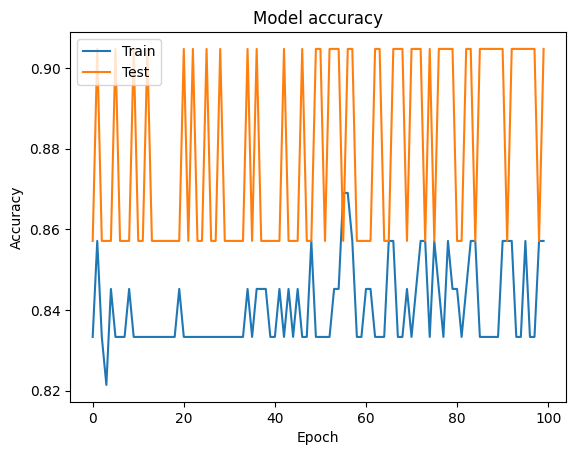

In [96]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


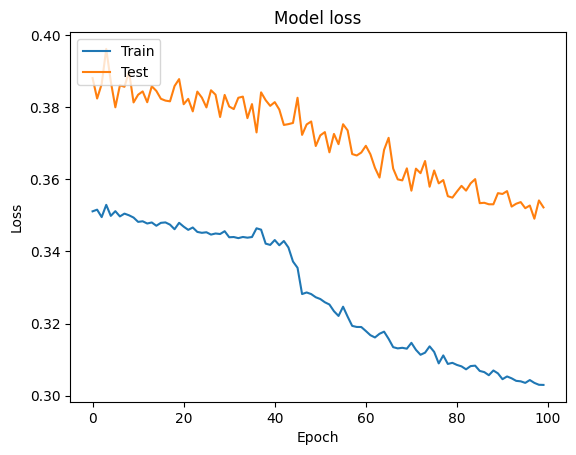

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [91]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 21ms/step


In [92]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [93]:
print("First 10 predictions:", y_pred_classes[:10])
print("First 10 actual labels:", y_test[:10])

First 10 predictions: [0 1 1 1 0 2 2 0 0 0]
First 10 actual labels: [0 1 1 1 1 2 2 1 0 0]
